# Introduction to Programming with Python

# Unit 6: While Loop

We ended the previous unit with an excercise to draw three polygons. Let's start with defining a function that will draw one polygon with specified number of sides `n` and length of each side `x`. To do it, we need to repeat drawing a side of length `x` `n` times, turning by a certain angle in between. Since we need to turn 360 degrees after drawing all sides, each individual angle would be $360/n$.

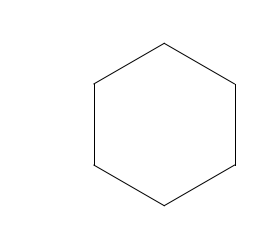

In [2]:
import jturtle as turtle

def poly(n,x):
    angle = 360/n
    for _ in range(n):
        turtle.forward(x)
        turtle.right(angle)

poly(6,100)
turtle.done()

Now, to draw three polygons with $n=3$, $5$ and $7$, we need a loop iterating over those numbers. This can either be accomplished by specifying all numbers in a list (like in the example below), or using clever `range` expression `range(3,8,2)`, or by looping `i` over numbers 0,1,2 with `range(3)`, and then calculating `n=3+2*i`.

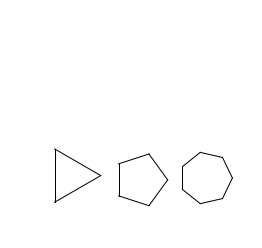

In [4]:
for i in [3,5,7]:
    poly(i,500/i)
    turtle.penup()
    turtle.right(90)
    turtle.forward(200)
    turtle.left(90)
    turtle.forward(20)
    turtle.pendown()
turtle.done()

Another trick that we do here is to decrease the size `x` as number of sides grows bigger. If we do not do it, each following $n$-gon will look  larger. You can experiment with the code above, putting constant size, or changing an expression on how it depends on $n$. 

By the way, we can create some nice graphics with `poly` function as well:

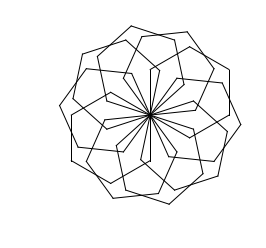

In [7]:
for i in range(10):
    poly(6,100)
    turtle.right(36)
turtle.done()

## While Loop

The loop we have learnt about so far is called `for`-loop, and it is useful when we know in advance how many times we need to repeat the process. However, there are some cases when this number is not known. Suppose we want to generate random quadratic equation that has solutions, using our function `random_equation` defined previously. In this case we probably need to generate random coefficients, and if the equation does not have solutions - repeat this process again. This can be achieved using another loop: **while** loop.

While loop looks like this:

```python
while condition:
    action
```

The code is executed in the following way:
1. `condition` is checked. If it is `False` - loop ends, execution continues from the code following the loop
2. If `condition` was `True` - action is executed
3. Evething repeats from step 1

It is worth noticing that `condition` should probably change inside the loop, i.e. some variables that are used within condition should change. In our case, we will generate new equation coefficients inside the loop, and check if it has solutions in the loop condition.

So, the code to generate "good" equation can look like this:

In [8]:
from pycourse import random_equation,solve

def random_good_equation():
    a,b,c = random_equation()
    while solve(a,b,c)!=None:
        a,b,c = random_equation()
    return a,b,c

print(random_good_equation())

(3, 0, 10)


In fact, there is more than one way to write `while`-loop in our case. The solution above has one small drawback - we need to write a call to `random_equation` twice. This can be avoided by using a variable that will contain the flag (`True`/`False` value) to indicate if the solution has been found:

In [10]:
def random_good_equation():
    solution_found = False
    while not solution_found:
        a,b,c = random_equation()
        solution_found = (solve(a,b,c)!=None)
    return a,b,c

print(random_good_equation())

(-1, -10, 12)


Notice how variable `solution_found` contains a true/false value, and how we can assign the result of comparison `solve(a,b,c)!=None` directly to this variable. Such true/false values are called **boolean values**, and it is one more type of values that Python can operate on (in addition to integers, floating point numbers and strings).

Yet one more way to think about this task is to write a condition when the loop should end. This can be accomplished by using `break` keyword, which is used to leave the loop. In this case we will write the loop as an **endless loop**, and then specify the exit condition:

In [11]:
def random_good_equation():
    while True:
        a,b,c = random_equation()
        if solve(a,b,c)!=None:
            break
    return a,b,c

print(random_good_equation())

(-1, -7, -4)


## Some Numerology

Let us consider one more example of using while loops, related to [numerology](https://en.wikipedia.org/wiki/Numerology) - a set of beliefs that numbers have some magical influence on our lives. Not implying that those beliefs are true, we will write a function that will help numerologists in one of their frequently used tasks: computing the number corresponding to some date. In order to do this, they often add up all individual digits of a number, until they get a single-digit number.

First, let us write a function that adds up all digits in a number. Note, that given a number $n$ (say, 123) we can compute its last (right-most) digit by dividing it by 10 and taking the remainder (123 % 10 = 3). Also, we can drop right-most digits by dividing the number by 10, and taking the whole part (this operation, **integer division**, is denoted in Python by `//`, so 123//10 = 12).

The function to add all digits will be implemented using while-loop, because we will add up all digits while there is still something to add. At some point, when dividing a number by 10, we will get 0 - and it will indicate the end of the loop:

In [12]:
def sum_digits(x):
    acc = 0
    while x>0:
        acc += x%10
        x = x//10
    return acc

sum_digits(12345)

15

However, numberologist will not stop at that, and to get the "final" number when would apply the same technique to the result, until it gets to one-digit number. We would need another while-loop to do that:

In [13]:
def magic_number(x):
    while x>10:
        x = sum_digits(x)
    return x

magic_number(12345)

6

Now we can compute the magic number corresponding to the current date. To do that, we will use `datetime` library:

In [19]:
import datetime
now = datetime.datetime.now()

number_date = now.day*1000000+now.month*10000+now.year
print(number_date, '->', magic_number(number_date))

20022020 -> 8


## Fibonacci Numbers: For loop vs. While loop

In mathematics, there is a beautiful sequence of numbers called **[Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number)** - a sequence, that starts with two numbers 1, where each next elements is equal to the sum of two previous ones:
$$
\begin{array}{l}
f_0 = f_1 = 1 \\
f_n = f_{n-1} + f_{n-2}, \quad n>1 \\
\end{array}
$$

Let us compute first 20 numbers in Fibonacci sequence:

In [3]:
c = p = 1
for _ in range(20):
    print(p, end=' ')
    c,p = c+p, c

1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 

In this algorithm, we use two variables - `c` to denote the *current* number, and `p` - the *previous* one. Initially both numbers are set to 1. During each iteration of the loop, we compute *next current* number as `c+p`, and assign current number `c` to `p`. Please note how we are doing the assignment in one line of code:
```
c,p = c+p, c
```
Writing the same code in two lines like that
```
c = c+p
p = c
```
would be an error, because the value of `c` would change after first line is executed.

In this example, we wanted to compute the known number of sequence elements, in our case 20. That is why it was convenient to use `for`-loop. Now suppose we want to compute the first Fibonacci number that exceeds 4000000. Because we do not know the number of iterations required, we can use `while` loop:

In [7]:
c = p = 1
while c<4000000:
    c,p = c+p, c
print(c)

5702887


Observe how the logic to compute Fibonacci numbers remained the same, while the loop around this logic changed from `for` to `while` depending on the task.

Now let us build on this code to solve more difficult problem!

## Exercise: Project Euler Problem 2

Those who want to learn programming need to practice solving many problems, starting from simple ones, and going towards more and more difficult ones. There is a project called **[Project Euler](http://projecteuler.net)** that contains a lot of problems you can practice solving. Let us consider one of those problems, [problem \#2](https://projecteuler.net/problem=2):

> *By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.*

Now that you know how to compute numbers in Fibonacci sequence, please solve this problem before proceeding with the next unit.